In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
stores_train = pd.read_csv('data/stores_train_extra_features.csv')
stores_train.head()

,store_id,grunnkrets_id,lat,lon,chain_name,mall_name,revenue,grunnkrets_population,district_population,distance_from_busstop,...,lv4,households_grunnkrets,municipality_name,area_km2,district_municipality_name,area_of_district,grunnkrets_population_density,district_population_density,district_per_capita_income,busstop_factor
0,983540538-974187930-44774,6020303,59.743104,10.204928,89,1,17.998,157.000000,38817.0,2.820000e-05,...,1110,398700,45,0.155779,99,6.211363,1007.837930,6249.352506,10.271273,-4.549751
1,987074191-973117734-44755,3010306,59.913759,10.734031,89,0,23.828,764.433051,75243.0,1.580000e-06,...,1110,374800,248,0.264278,936,10.905851,2892.533223,6899.323980,4.981194,-5.199283
2,984890265-981157303-64491,6050102,60.164751,10.254656,20,1,16.099,372.000000,39644.0,1.370000e-07,...,1110,347900,264,0.160152,476,7.359366,2322.789575,5386.877260,8.775603,-6.863279
3,914057442-992924179-126912,18040102,67.283669,14.379796,20,1,9.296,474.000000,48488.0,2.730000e-07,...,1110,394000,33,0.095029,945,1.262214,4987.952411,38415.043567,8.125722,-5.864867
4,913018583-913063538-668469,16017414,63.358068,10.374832,20,1,4.528,764.433051,4938.0,4.380000e-06,...,1110,623700,355,0.251070,1151,7.106081,3044.698266,694.897816,126.306197,-5.057496


In [2]:
#grunnkrets = pd.read_csv('data/grunnkrets_norway_stripped.csv')
#grunnkrets.head()

In [3]:
#grunnkrets.nunique()

In [4]:
# stores_train.tail()

In [5]:
stores_train = stores_train[stores_train.revenue > 0.0]

In [6]:
stores_train['revenue'] = np.log10(stores_train['revenue'])

In [7]:
stores_train.isnull().sum()

store_id                         0
grunnkrets_id                    0
lat                              0
lon                              0
chain_name                       0
mall_name                        0
revenue                          0
grunnkrets_population            0
district_population              0
distance_from_busstop            0
busstop_importance_level         0
lv1                              0
lv2                              0
lv3                              0
lv4                              0
households_grunnkrets            0
municipality_name                0
area_km2                         0
district_municipality_name       0
area_of_district                 0
grunnkrets_population_density    0
district_population_density      0
district_per_capita_income       0
busstop_factor                   0
dtype: int64

In [8]:
stores_train = stores_train.drop(['store_id'], axis = 1) 
stores_train

,grunnkrets_id,lat,lon,chain_name,mall_name,revenue,grunnkrets_population,district_population,distance_from_busstop,busstop_importance_level,...,lv4,households_grunnkrets,municipality_name,area_km2,district_municipality_name,area_of_district,grunnkrets_population_density,district_population_density,district_per_capita_income,busstop_factor
0,6020303,59.743104,10.204928,89,1,1.255224,157.000000,38817.0,2.820000e-05,0,...,1110,398700,45,0.155779,99,6.211363,1007.837930,6249.352506,10.271273,-4.549751
1,3010306,59.913759,10.734031,89,0,1.377088,764.433051,75243.0,1.580000e-06,3,...,1110,374800,248,0.264278,936,10.905851,2892.533223,6899.323980,4.981194,-5.199283
2,6050102,60.164751,10.254656,20,1,1.206799,372.000000,39644.0,1.370000e-07,0,...,1110,347900,264,0.160152,476,7.359366,2322.789575,5386.877260,8.775603,-6.863279
3,18040102,67.283669,14.379796,20,1,0.968296,474.000000,48488.0,2.730000e-07,4,...,1110,394000,33,0.095029,945,1.262214,4987.952411,38415.043567,8.125722,-5.864867
4,16017414,63.358068,10.374832,20,1,0.655906,764.433051,4938.0,4.380000e-06,1,...,1110,623700,355,0.251070,1151,7.106081,3044.698266,694.897816,126.306197,-5.057496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,7010705,59.416276,10.480970,1,0,-1.055517,1516.000000,87790.0,1.820000e-06,0,...,28112,381900,135,0.291337,949,7.359366,5203.601337,11929.017119,4.350154,-5.739929
12855,5020406,60.799991,10.693635,1,1,0.259116,503.000000,27605.0,8.710000e-06,0,...,28112,292000,97,0.137188,946,7.359366,3666.513042,3751.002592,10.577794,-5.059982
12856,2310803,59.946562,11.007659,1,1,1.582347,1117.000000,88666.0,2.520000e-06,0,...,28112,440200,296,0.123431,1027,7.359366,9049.611721,12048.049115,4.964699,-5.598599
12857,11020113,58.850261,5.735674,1,1,0.561340,281.000000,21524.0,1.200000e-06,0,...,28112,382400,283,0.034857,952,7.359366,8061.539671,2924.708560,17.766214,-5.920819


In [9]:
# stores_train['grunnkrets_population'] = (stores_train['grunnkrets_population'].fillna(stores_train.grunnkrets_population.mean()))
# stores_train['district_population'] = (stores_train['district_population'].fillna(stores_train.district_population.mean()))
# stores_train['area_km2'] = (stores_train['area_km2'].fillna(stores_train.area_km2.mean()))

In [10]:
# stores_train.isnull().sum()

In [11]:
data = stores_train

In [16]:
data['district_population_density'] = np.log10(data.district_population_density)

C:\Users\andyg\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
Y= data[['revenue']]
Y=np.ravel(Y)
X= data.drop('revenue', axis =1)
X.head()

,grunnkrets_id,lat,lon,chain_name,mall_name,grunnkrets_population,district_population,distance_from_busstop,busstop_importance_level,lv1,...,lv4,households_grunnkrets,municipality_name,area_km2,district_municipality_name,area_of_district,grunnkrets_population_density,district_population_density,district_per_capita_income,busstop_factor
0,6020303,59.743104,10.204928,89,1,157.000000,38817.0,2.820000e-05,0,1,...,1110,398700,45,0.155779,99,6.211363,1007.837930,6249.352506,10.271273,-4.549751
1,3010306,59.913759,10.734031,89,0,764.433051,75243.0,1.580000e-06,3,1,...,1110,374800,248,0.264278,936,10.905851,2892.533223,6899.323980,4.981194,-5.199283
2,6050102,60.164751,10.254656,20,1,372.000000,39644.0,1.370000e-07,0,1,...,1110,347900,264,0.160152,476,7.359366,2322.789575,5386.877260,8.775603,-6.863279
3,18040102,67.283669,14.379796,20,1,474.000000,48488.0,2.730000e-07,4,1,...,1110,394000,33,0.095029,945,1.262214,4987.952411,38415.043567,8.125722,-5.864867
4,16017414,63.358068,10.374832,20,1,764.433051,4938.0,4.380000e-06,1,1,...,1110,623700,355,0.251070,1151,7.106081,3044.698266,694.897816,126.306197,-5.057496


In [13]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 42,
                                  n_jobs =-1,
                                 #  n_estimators = 3000,
                                 )  

In [14]:
regressor.fit(X,Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [14]:
score = regressor.score(X,Y)
score

0.9019863181542008

In [15]:
regressor.fit(X,Y)

RandomForestRegressor(n_estimators=3000, n_jobs=-1, random_state=42)

In [16]:
score = regressor.score(X,Y)
score

0.9019863181542008

In [17]:
pd.DataFrame({'Variable':X.columns,
              'Importance':regressor.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
3,chain_name,0.248046
12,lv4,0.092501
11,lv3,0.080198
7,distance_from_busstop,0.066117
2,lon,0.063996
1,lat,0.062611
15,area_km2,0.061097
6,district_population,0.060085
5,grunnkrets_population,0.058291
13,households_grunnkrets,0.046443


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (10113, 17)
X_test (2529, 17)
y_train (10113,)
y_test (2529,)


In [19]:
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=3000, n_jobs=-1, random_state=42)

In [20]:
score = regressor.score(X_train,y_train)
score                            

0.9028149266489607

In [21]:
y_pred = regressor.predict(X_test) 
score = regressor.score(X_test,y_test) 
score                            

0.34321389939182256

In [22]:
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse                                              

0.5286634037883378

In [23]:
y_pred_non_log = 10**(y_pred)
y_test_non_log = 10**(y_test)

In [24]:
from sklearn.metrics import mean_squared_log_error
rmsle = mean_squared_log_error(y_test_non_log,y_pred_non_log)**0.5
rmsle                                          

0.7868430028627497

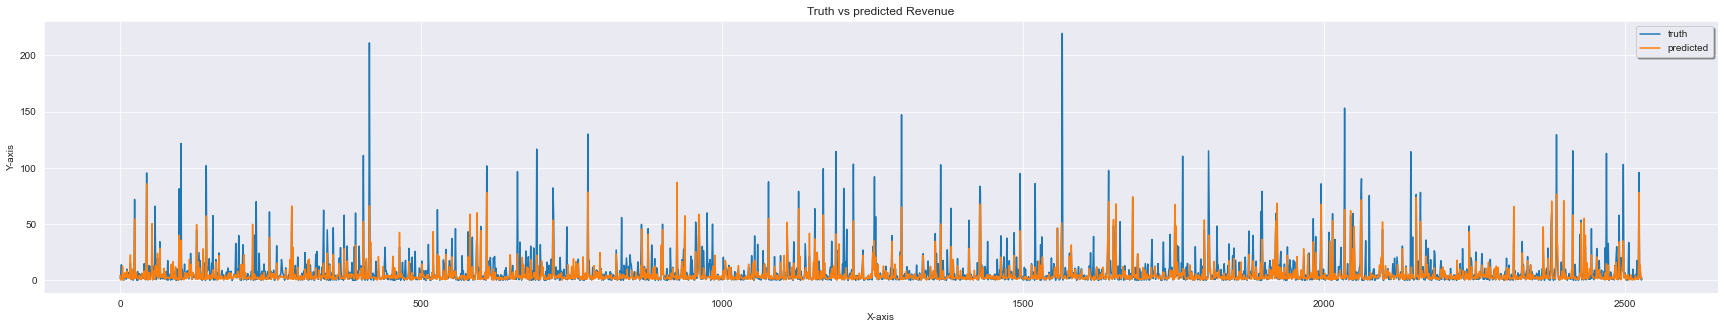

In [25]:
x_ax = range(len(y_test_non_log))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax, y_test_non_log, label="truth")
plt.plot(x_ax, y_pred_non_log, label="predicted")
plt.title("Truth vs predicted Revenue")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()